In [24]:
import numpy as np
import networkx as nx
from numpy import genfromtxt
import matplotlib.pyplot as plt

In [140]:

class RGraph():
    def __init__(self, num_location, num_home, starting_location):
        self.num_location = num_location
        self.num_home = num_home
        self.starting_location = starting_location
        self.edge_matrix = np.zeros((self.num_location, self.num_location))
        self.visited = {}
        self.locations = [starting_location]

    def check_if_connected(self):
        return all([value for value in self.visited.values()])

    def dfs(self, i):
        self.visited[i] = True
        for j in range(self.num_location):
            if self.edge_matrix[i][j] != 0 and not self.visited[j]:
                self.dfs(j)


    def generate_random_edge(self):
        return np.around(np.random.uniform(0,1000000000), 5)
    def random_input_generator(self):

        p = 0.4
        for i in range(self.num_location-1):
            self.locations.append("location{}".format(i+1))

        for i in range(self.num_location):
            for j in range(self.num_location):
                if j > i or i == j :
                    continue
                num2 = np.random.uniform(0,1)
                if num2 < p:
                    rand_num = self.generate_random_edge()
                    self.edge_matrix[i][j], self.edge_matrix[j][i] = rand_num, rand_num

        # check if the graph is connected
        self.visited = dict([(i, False) for i in range(self.num_location)])
        self.dfs(0)
        if self.check_if_connected():
            print('connected')
        else:
            print('not connected')

        homes = self.locations.copy()[1:]
        np.random.shuffle(homes)

        self.generate_input(homes)

    def generate_input(self, homes):
        print(self.num_location)
        print(self.num_home)

        [print(v, end =  ' ') for v in self.locations]
        print()
        [print(h, end =  ' ') for h in homes[:self.num_home]]
        print()
        print(self.starting_location)
        for i in range(self.num_location):
            for j in range(self.num_location):
                if self.edge_matrix[i][j] == 0:
                    print("x", end = ' ')
                else:
                    print(str(self.edge_matrix[i][j]), end = ' ')
            print()
            
        

In [141]:
g = RGraph(50, 25, "Soda")
g.random_input_generator()

connected
50
25
Soda location1 location2 location3 location4 location5 location6 location7 location8 location9 location10 location11 location12 location13 location14 location15 location16 location17 location18 location19 location20 location21 location22 location23 location24 location25 location26 location27 location28 location29 location30 location31 location32 location33 location34 location35 location36 location37 location38 location39 location40 location41 location42 location43 location44 location45 location46 location47 location48 location49 
location38 location40 location11 location47 location28 location41 location19 location25 location48 location27 location17 location39 location13 location4 location10 location22 location32 location35 location37 location33 location2 location18 location29 location12 location36 
Soda
x x 55816225.88107 x x 361511722.15012 x 163037789.68506 360910933.67028 477625399.06569 x 620771230.00649 x 841963585.03791 810217497.7957 719371276.66924 365125482.633

x x x 392885377.23196 239503596.49318 766394765.47785 x x x x 428931870.18538 x x 759904166.09532 384907729.63842 787553210.62131 419782915.72296 948194677.76359 x x x x x 895159782.33082 385746018.38824 x x x 763320522.22309 x x 431178399.21862 x x x x 767807391.18536 111015635.57728 x 635828832.57165 x x 667947433.24027 x x 597908132.66364 x 747016800.86128 x x 
x x x 937143900.48538 x x 445603541.22503 x x x x x 977388280.2907 919926047.09446 x x 875411280.87347 x x x x 863537563.94394 305891011.35953 x 534152748.83886 x 103930252.97802 278442841.02775 x x x x 219002107.27484 x x x x x x 577602379.34437 x x x x 921060226.32074 x x 192150234.6815 937527184.62184 x 
968598863.57348 954772602.08338 722409363.02332 x x x 369012544.11894 x x 66540445.20614 x x x x 561101659.74355 x 506440442.44871 x x x x x x x x 232682564.75129 548514146.27287 x x x x 911158036.64356 x 905088284.37002 767807391.18536 x x x x x 35110703.47826 x x x 768951300.00564 x x x x x 
x x x 491363150.85469 3718087

{0: 'Soda', 1: 'location1', 2: 'location2', 3: 'location3', 4: 'location4', 5: 'location5', 6: 'location6', 7: 'location7', 8: 'location8', 9: 'location9', 10: 'location10', 11: 'location11', 12: 'location12', 13: 'location13', 14: 'location14', 15: 'location15', 16: 'location16', 17: 'location17', 18: 'location18', 19: 'location19', 20: 'location20', 21: 'location21', 22: 'location22', 23: 'location23', 24: 'location24', 25: 'location25', 26: 'location26', 27: 'location27', 28: 'location28', 29: 'location29', 30: 'location30', 31: 'location31', 32: 'location32', 33: 'location33', 34: 'location34', 35: 'location35', 36: 'location36', 37: 'location37', 38: 'location38', 39: 'location39', 40: 'location40', 41: 'location41', 42: 'location42', 43: 'location43', 44: 'location44', 45: 'location45', 46: 'location46', 47: 'location47', 48: 'location48', 49: 'location49'}


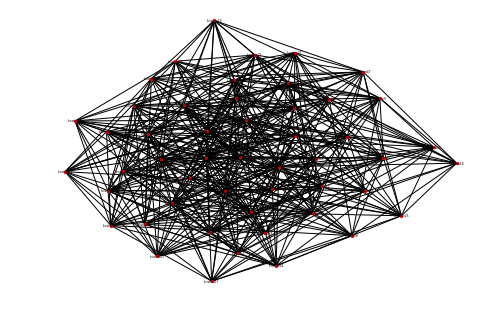

[[0.00000000e+00 0.00000000e+00 5.58162259e+07 ... 0.00000000e+00
  0.00000000e+00 1.38240960e+08]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [5.58162259e+07 0.00000000e+00 0.00000000e+00 ... 1.68029017e+08
  2.25934324e+08 6.80015605e+08]
 ...
 [0.00000000e+00 0.00000000e+00 1.68029017e+08 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 2.25934324e+08 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.38240960e+08 0.00000000e+00 6.80015605e+08 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


In [142]:
def show_graph(adjacency_matrix, locations):
    labeldict = {i:label for i, label in enumerate(locations)}
    print(labeldict)
    rows, cols = np.where(adjacency_matrix != 0)
    edges = zip(rows.tolist(), cols.tolist())
    gr = nx.Graph()
    gr.add_edges_from(edges)
    nx.draw(gr, node_size=5, labels=labeldict, with_labels = True, font_size=3)
    plt.show()

show_graph(g.edge_matrix, g.locations)
print(g.edge_matrix)